## 1. Requeriments

In [392]:
# import os
# import torch
# os.environ['TORCH'] = torch.__version__
# print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# # !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
# !pip install -q captum

## 2. Import libraries

In [393]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import random

## 3. Graph building

### 3.1. Gene matrix

In [394]:
genes = pd.read_csv('../Data/Programmed cell death protein/Programmed_cell_death_protein_matrix.csv')
Y = genes.Y

genes = genes.iloc[:,1:39] 
genes

,ACPP,FOLH1,FRAT1,FRAT2,ICOS,ICOSLG,ITK,MTCP1,NFATC1,NFATC2,...,TCF7L1,TCIRG1,TCL1A,TCL1B,TLX1,TLX2,TLX3,WT1,WTAP,WTIP
0,24.643264,33.06366,22.86623,25.14807,23.66478,31.25529,31.97483,32.68788,32.00358,31.98820,...,29.73447,33.92966,21.65301,21.31325,25.58066,21.09375,21.21067,27.25894,32.30986,30.89343
1,30.478681,33.34812,27.58122,27.19051,27.81065,29.88798,32.85944,34.62906,30.96356,31.94520,...,31.39434,33.85213,21.65301,21.31325,21.06706,24.61959,21.21067,22.90940,33.64920,32.19936
2,30.556110,32.20052,25.38929,26.69664,26.66294,30.92857,31.09956,33.46376,31.30038,31.04482,...,30.94080,33.53312,26.38498,21.31325,21.06706,21.09375,21.21067,22.90940,35.26323,29.13798
3,30.253267,34.48359,28.10294,26.49687,23.66478,29.47329,31.18813,33.10176,31.65882,32.62476,...,31.69465,32.51771,24.98799,21.31325,21.06706,26.34435,21.21067,30.72576,33.85052,32.61099
4,24.643264,34.68356,27.09929,22.82728,23.66478,32.22363,33.25193,32.65197,32.94580,33.70037,...,30.41687,33.75841,21.65301,21.31325,21.06706,21.09375,21.21067,31.55831,33.25769,29.29437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,29.643765,33.58120,26.78622,27.10293,22.97275,30.82689,26.57659,33.91039,31.93211,31.61476,...,31.55301,32.80839,20.32437,21.31293,21.09326,21.18281,21.37595,33.76553,32.92597,33.36054
177,32.256558,31.42896,21.76825,26.01421,29.53775,27.72514,30.11127,34.06419,29.13034,29.95589,...,27.36919,33.87425,25.58961,21.31293,21.09326,21.18281,21.37595,29.72826,35.27110,27.34363
178,26.275234,34.13379,26.74567,26.15839,28.98194,31.82216,33.03207,32.87564,32.10593,32.57213,...,31.82891,33.58358,20.32437,21.31293,21.09326,26.68332,21.37595,24.56089,33.08478,32.23764
179,31.822287,32.24862,25.46541,22.81349,27.50438,31.74571,31.83385,33.71362,31.09448,32.49485,...,30.01069,34.20252,20.32437,21.31293,21.09326,21.18281,21.37595,29.86003,32.15581,32.35205


### 3.2. Graph edges

In [395]:
path ='../Data/Programmed cell death protein/network_edges_pd-1.tsv'
data = pd.read_csv(path, delimiter='\t')
edge_index1=data['#node1'].to_numpy()
edge_index2=data['node2'].to_numpy()

In [396]:
le = preprocessing.LabelEncoder()
le.fit(edge_index1)
len(list(le.classes_))

38

In [397]:
edge_index1 = le.transform(edge_index1)
edge_index2 = le.transform(edge_index2)

In [398]:
edge_index = [edge_index1]+[edge_index2]
edge_index = np.array(edge_index)

In [399]:
edge_index

array([[ 0,  0,  5,  5,  1,  1,  2,  3,  4,  4,  4,  4,  6,  7,  7,  8,
         8,  8,  8,  9,  9,  9,  9, 10, 11, 11, 11, 12, 12, 13, 13, 13,
        14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17,
        17, 18, 18, 19, 20, 21, 22, 22, 22, 22, 22, 22, 23, 23, 24, 24,
        25, 25, 25, 25, 26, 26, 27, 27, 27, 28, 29, 30, 30, 31, 31, 32,
        32, 32, 33, 34, 34, 35, 35, 35, 36, 37],
       [22, 19,  4, 17, 24, 22,  3,  2, 18,  6, 17,  5,  4, 31, 30, 29,
        11, 17,  9, 11, 10, 12,  8,  9, 12,  8,  9, 11,  9, 16, 14, 15,
        22, 13, 15, 16, 22, 13, 14, 16, 22, 13, 14, 15,  4,  8, 27,  5,
        18,  4, 17,  0, 21, 20,  1, 24, 15, 14,  0, 16, 25, 27,  1, 22,
        33, 23, 34, 32, 34, 32, 28, 17, 23, 27,  8, 31,  7,  7, 30, 25,
        35, 26, 25, 25, 26, 32, 37, 36, 35, 35]])

In [400]:
edge_index = torch.tensor(edge_index, dtype=torch.int64)
edge_index

tensor([[ 0,  0,  5,  5,  1,  1,  2,  3,  4,  4,  4,  4,  6,  7,  7,  8,  8,  8,
          8,  9,  9,  9,  9, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14,
         15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 19, 20, 21,
         22, 22, 22, 22, 22, 22, 23, 23, 24, 24, 25, 25, 25, 25, 26, 26, 27, 27,
         27, 28, 29, 30, 30, 31, 31, 32, 32, 32, 33, 34, 34, 35, 35, 35, 36, 37],
        [22, 19,  4, 17, 24, 22,  3,  2, 18,  6, 17,  5,  4, 31, 30, 29, 11, 17,
          9, 11, 10, 12,  8,  9, 12,  8,  9, 11,  9, 16, 14, 15, 22, 13, 15, 16,
         22, 13, 14, 16, 22, 13, 14, 15,  4,  8, 27,  5, 18,  4, 17,  0, 21, 20,
          1, 24, 15, 14,  0, 16, 25, 27,  1, 22, 33, 23, 34, 32, 34, 32, 28, 17,
         23, 27,  8, 31,  7,  7, 30, 25, 35, 26, 25, 25, 26, 32, 37, 36, 35, 35]])

### 3.3. Create dataset

In [401]:
list_data_0=[]
list_data_1=[]

for g in range(len(genes)):
  b=[]
  for i in genes.iloc[g].to_numpy():
    a=[]
    a.append(i*10)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float).reshape([-1])
  edge_index = edge_index
  y = torch.tensor([Y.iloc[g]], dtype=torch.float).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  if y == 0:
    list_data_0.append(data)
  else:
    list_data_1.append(data)

print(list_data_0[0])

Data(x=[38], edge_index=[2, 90], y=[1, 1])


In [402]:
len(list_data_1)

96

### 3.4. Patient sample

In [403]:
data = list_data_0[0]
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of charcateristics per node: {data.num_features}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 38
Number of charcateristics per node: 1
Number of edges: 90
Average node degree: 2.37
Has isolated nodes: False
Has self-loops: False
Is undirected: True


## 4. Graph training

### 4.1. Train-Test splitting

In [404]:
torch.manual_seed(125)
random.shuffle(list_data_0)
random.shuffle(list_data_1)

train_dataset = list_data_0[0:72]
test_dataset = list_data_0[72:86]
train_dataset = train_dataset + list_data_1[0:81]
test_dataset = test_dataset + list_data_1[81:97]
random.shuffle(train_dataset)
random.shuffle(test_dataset)
print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')
cont = 0
cont1=0
for i in train_dataset:
    if i.y == 0:
        cont+=1
for i in test_dataset:
    if i.y == 0:
        cont1+=1
print("Negative cases from train: " + str(cont) + " of " + str(len(train_dataset)) + " = " + str(cont/len(train_dataset)))
print("Negative cases from test: " + str(cont1) + " of " + str(len(test_dataset)) + " = " + str(cont1/len(test_dataset)))
print("It should be 46.9")

Number of training graphs: 153
Number of test graphs: 28
Negative cases from train: 72 of 153 = 0.47058823529411764
Negative cases from test: 13 of 28 = 0.4642857142857143
It should be 46.9


In [405]:
# torch.manual_seed(0)
# random.shuffle(list_data)
# train_dataset = list_data[0:124]
# test_dataset = list_data[124:182]
# print(f'Number of training graphs: {len(train_dataset)}')
# print(f'Number of test graphs: {len(test_dataset)}')
# cont = 0
# cont1=0
# for i in train_dataset:
#     if i.y == 0:
#         cont+=1
# for i in test_dataset:
#     if i.y == 0:
#         cont1+=1
# print("Negative cases from train: " + str(cont) + " of " + str(len(train_dataset)) + " = " + str(cont/len(train_dataset)))
# print("Negative cases from test: " + str(cont1) + " of " + str(len(test_dataset)) + " = " + str(cont1/len(test_dataset)))
# print("It should be 46.9")

In [406]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 32
DataBatch(x=[1216], edge_index=[2, 2880], y=[32, 1], batch=[1216], ptr=[33])

Step 2:
Number of graphs in the current batch: 32
DataBatch(x=[1216], edge_index=[2, 2880], y=[32, 1], batch=[1216], ptr=[33])

Step 3:
Number of graphs in the current batch: 32
DataBatch(x=[1216], edge_index=[2, 2880], y=[32, 1], batch=[1216], ptr=[33])

Step 4:
Number of graphs in the current batch: 32
DataBatch(x=[1216], edge_index=[2, 2880], y=[32, 1], batch=[1216], ptr=[33])

Step 5:
Number of graphs in the current batch: 25
DataBatch(x=[950], edge_index=[2, 2250], y=[25, 1], batch=[950], ptr=[26])



### 4.2. Training and testing the model

In [407]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GraphConv, global_add_pool
from torch_geometric.nn import TopKPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
from torch import nn
from sklearn.metrics import roc_auc_score

In [408]:
embed_dim = 38

class Net(torch.nn.Module):
    def __init__(self, dim):
        super(Net, self).__init__()
        self.dim = dim
        super(Net, self).__init__()
        self.conv1 = GraphConv(embed_dim, dim)
        self.pool1 = TopKPooling(dim, ratio=0.8)
        self.conv2 = GraphConv(dim, dim)
        self.pool2 = TopKPooling(dim, ratio=0.8)
        self.item_embedding = torch.nn.Embedding(num_embeddings=368, embedding_dim=embed_dim)
        self.lin1 = torch.nn.Linear(38, 19)
        self.lin3 = torch.nn.Linear(19, 1)
        self.act1 = torch.nn.ReLU()
        print(self)

    def forward(self, x, edge_index, batch):
        x = torch.tensor(x).to(torch.int)
        x = self.item_embedding(x)
        x = x.squeeze(1)

        x = F.relu(self.conv1(x, edge_index))
        x, edge_index, _, batch, _, _ = self.pool1(x, edge_index, None, batch)
        x1 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        # x = F.relu(self.conv2(x, edge_index))
        # x, edge_index, _, batch, _, _ = self.pool2(x, edge_index, None, batch)
        # x2 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        x = x1 #+ x2

        x = self.lin1(x)
        x = self.act1(x)

        x = F.dropout(x, p=0.5, training=self.training)
        x = torch.sigmoid(self.lin3(x)).squeeze(1)
        return x


In [409]:
def train(epoch):
    model.train()
    criterion = nn.BCELoss()
    loss_all = 0
    for data in train_loader:
        output = model(data.x, data.edge_index, data.batch)
        loss = criterion(output, data.y.squeeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_all += loss.item() * data.num_graphs

    return loss_all / len(train_dataset)


def test(loader):
    model.eval()

    correct = 0
    for data in loader:
        data = data
        output = model(data.x, data.edge_index, data.batch)
        for i in range(len(output)):
            if output[i]>0.5:
                output[i]=1
            else:
                output[i]=0
            if output[i]==data.y[i]:
                correct=correct+1
    # print("Correct: "+str(correct) +" of "+str(len(loader.dataset)))
    return correct / len(loader.dataset)

Net(
  (conv1): GraphConv(38, 19)
  (pool1): TopKPooling(19, ratio=0.8, multiplier=1.0)
  (conv2): GraphConv(19, 19)
  (pool2): TopKPooling(19, ratio=0.8, multiplier=1.0)
  (item_embedding): Embedding(368, 38)
  (lin1): Linear(in_features=38, out_features=19, bias=True)
  (lin3): Linear(in_features=19, out_features=1, bias=True)
  (act1): ReLU()
)
Epoch: 001, Loss: 0.6933, Train Acc: 0.5294, Test Acc: 0.5357


C:\Users\sandr\AppData\Local\Temp/ipykernel_4644/3374044401.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).to(torch.int)


Epoch: 002, Loss: 0.6894, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 003, Loss: 0.6816, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 004, Loss: 0.6763, Train Acc: 0.5359, Test Acc: 0.5357
Epoch: 005, Loss: 0.6819, Train Acc: 0.5359, Test Acc: 0.5357
Epoch: 006, Loss: 0.6770, Train Acc: 0.5359, Test Acc: 0.5357
Epoch: 007, Loss: 0.6783, Train Acc: 0.5359, Test Acc: 0.5357
Epoch: 008, Loss: 0.6668, Train Acc: 0.5425, Test Acc: 0.5357
Epoch: 009, Loss: 0.6589, Train Acc: 0.5621, Test Acc: 0.5357
Epoch: 010, Loss: 0.6510, Train Acc: 0.6078, Test Acc: 0.5714
Epoch: 011, Loss: 0.6613, Train Acc: 0.6928, Test Acc: 0.6429
Epoch: 012, Loss: 0.6559, Train Acc: 0.7386, Test Acc: 0.6786
Epoch: 013, Loss: 0.6353, Train Acc: 0.7451, Test Acc: 0.6786
Epoch: 014, Loss: 0.6299, Train Acc: 0.7451, Test Acc: 0.7143
Epoch: 015, Loss: 0.6123, Train Acc: 0.7778, Test Acc: 0.7143
Epoch: 016, Loss: 0.6253, Train Acc: 0.7908, Test Acc: 0.7857
Epoch: 017, Loss: 0.5949, Train Acc: 0.8105, Test Acc: 0.7500
Epoch: 0

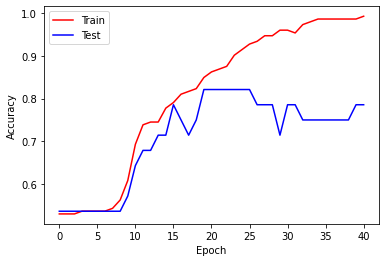

In [410]:
import matplotlib.pyplot as plt
model = Net(dim=19)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_epoch=[]
test_epoch=[]
epoch = 1
train_acc=0
while train_acc < 0.99 and epoch < 100:
    loss = train(epoch)
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    train_epoch.append(train_acc)
    test_epoch.append(test_acc)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
          f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
    epoch +=1

plt.plot(train_epoch, color="red", label='Train')
plt.plot(test_epoch, color="blue", label = 'Test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()